# COMM 337 Project 2

# Part A. Cluster Analysis

Begin by reading in the book titles from the file `all_book_titles.txt` (which should be in the same folder as this Jupyter notebook). Complete the following tasks:

   1. Read the book titles into a list of strings named `titles`.
   2. Display the first 8 titles in your list. 
   3. Print the total number of book titles in your list.
   

In [1]:
# 1. Read the book titles into a list of strings named `titles`.
file = open('all_book_titles.txt')
content = file.read()
titles = content.split('\n')

In [2]:
# 2. Display the first 8 titles in your list. 
for i in range(8):
    print(titles[i])

Philosophy of Sex and Love A Reader
Readings in Judaism, Christianity, and Islam
Microprocessors Principles and Applications
Bernhard Edouard Fernow: Story of North American Forestry
Encyclopedia of Buddhism
Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications
American Anthem: Student Edition Modern Era 2007
How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines


In [3]:
# 3. Print the total number of book titles in your list.
print(len(titles))

2374


In this problem, we use k-means to cluster the book titles. The goal of this problem is to choose the best `k` based on the silhouette score.


* For each k=10, 30, 50, ..., 190: cluster all the book titles into k clusters (specify random_state = 100), and compute and print the silhouette score for this choice of k.


Before we cluster the book titles using k-means, we need to represent each title as a feature vector, very similar to building a histogram. We have provided this code for you. The code uses scikit-learn's [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class, which represents each document as a feature vector. The resulting variable `X` is a 2-D numpy array, and has rows corresponding to titles, and columns corresponding to different words. For the purposes of this exercise, you do *not* have to worry about how this works. Just treat `X` as a 2D numpy array where rows are feature vectors.

In [4]:
# ****** DO NOT MODIFY CODE IN THIS CELL ******
# If your code above works correctly, then running this cell should output (2373, 176).

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=20, max_df=0.8)
X = vectorizer.fit_transform(titles)

print(X.shape)


(2374, 176)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics    

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [6]:
best_score = -np.inf
best_i = None

for i in range(10, 191, 10):
    title_kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    title_kmeans.fit(X)
    y_kmeans = title_kmeans.predict(X)
    score = metrics.silhouette_score(X, y_kmeans)

    if score > best_score:
        best_score = score
        best_i = i

print(str(best_i) + " has the best silhouette score, with a score of " + str(best_score))


130 has the best silhouette score, with a score of 0.18844813861343027


Interpret the clustering results:

* After you obtain the best `k`, print out the book titles in the first 10 clusters given by the best model, and interpret each cluster briefly. 

In [7]:
title_kmeans = KMeans(n_clusters = 130, init = 'k-means++', random_state = 100)
title_kmeans.fit(X)
y_kmeans = title_kmeans.predict(X)

In [8]:
# initialize dictionary to hold titles in each cluster, each key holds empty list
clusters = {}
for cluster in range(130):
    clusters[cluster] = []

# assign titles in original list to each key in dictionary based on their cluster
for index, i in np.ndenumerate(y_kmeans): #source: https://stackoverflow.com/questions/42082607/iterate-over-numpy-with-index-numpy-equivalent-of-python-enumerate
    clusters[i].append(titles[index[0]])

# print titles in first 10 clusters
for key in range(10):
    print('Cluster ' + str(key + 1) + ' contains: ')
    for item in clusters[key]:
        print(item)
    print()


Cluster 1 contains: 
Fluid Mechanics With Engineering Applications
Foundations of Materials Science and Engineering
Shigley's Mechanical Engineering Design (Mcgraw-Hill Series in Mechanical Engineering)
Engineering Circuit Analysis
Fundamentals of Chemical Engineering Thermodynamics (Prentice Hall International Series in the Physical and Chemical Engineering Sciences)
Engineering Mechanics: Dynamics (13th Edition)
Engineering Mechanics: Statics (13th Edition)
Introductory Chemical Engineering Thermodynamics (2nd Edition) (Prentice Hall International Series in the Physical and Chemical Engineering Sciences)
Microelectronic Circuits (The Oxford Series in Electrical and Computer Engineering)
Engineering Mechanics - Statics
Engineering Mechanics: Dynamics
Basic Engineering Circuit Analysis
Probability Concepts in Engineering Emphasis on Applications in Civil & Environmental Engineering
A First Course in Numerical Methods (Computational Science and Engineering)
Engineering Fluid Mechanics
B

Cluster Interpretation:

The clusters appear to be sorted by the appearance of certain key words/phrases. Those phrases are listed below for each cluster. Phrases are listed in order of priority, first phrases listed generally appear in almost every title, while the second phrases listed appear often but not in every title. 

Cluster 1: Engineering\
Cluster 2: Computer, Security\
Cluster 3: Principles, Applications\
Cluster 4: Applications (without the presence of Principles), Calculus\
Cluster 5: History, Volume\
Cluster 6: Access Card Package\
Cluster 7: Human Physiology, Anatomy\
Cluster 8: Practice, Theory\
Cluster 9: **This cluster has no easily observable pattern, it is unclear how it was generated\
Cluster 10: Sociology

**Note: As discussed with TA, the clusters are generated differently when ran on Mac OS vs. windows OS. The observations above are based on results from windows OS. For reference these results are below:**

Cluster 1 contains: 
Fluid Mechanics With Engineering Applications
Foundations of Materials Science and Engineering
Shigley's Mechanical Engineering Design (Mcgraw-Hill Series in Mechanical Engineering)
Engineering Circuit Analysis
Fundamentals of Chemical Engineering Thermodynamics (Prentice Hall International Series in the Physical and Chemical Engineering Sciences)
Engineering Mechanics: Dynamics (13th Edition)
Engineering Mechanics: Statics (13th Edition)
Introductory Chemical Engineering Thermodynamics (2nd Edition) (Prentice Hall International Series in the Physical and Chemical Engineering Sciences)
Microelectronic Circuits (The Oxford Series in Electrical and Computer Engineering)
Engineering Mechanics - Statics
Engineering Mechanics: Dynamics
Basic Engineering Circuit Analysis
Probability Concepts in Engineering Emphasis on Applications in Civil & Environmental Engineering
A First Course in Numerical Methods (Computational Science and Engineering)
Engineering Fluid Mechanics
Battery Systems Engineering

Cluster 2 contains: 
Computer Security
Analyzing Computer Security: A Threat / Vulnerability / Countermeasure Approach
Introduction to Computer Security
Computer Networking for LANs to WANs: Hardware, Software and Security
Guide to Computer Network Security (Computer Communications and Networks)
Computer Network Security: Theory and Practice

Cluster 3 contains: 
Microprocessors Principles and Applications
Electronic Principles 
Digital Electronics: Principles and Applications
Principles of Environmental Science: Inquiry and Applications
Electronics Principles and Applications with Student Data CD-Rom
68000 Microprocessor Hardware and Software Principles and Applications
Principles of Data Networks And Computer Communications 
Economics : Principles, Applications, and Tools
Principles of Electric Circuits: Conventional Current Version
Tourism: Principles, Practices, Philosophies
Pharmacology : Principles and Applications

Cluster 4 contains: 
Benson's Microbiological Applications Complete Version (Brown, Microbioligical Applications)
Power Electronics: Circuits, Devices and Applications (3rd Edition)
Calculus and Its Applications
Calculus with Applications, Brief Version (10th Edition)
Calculus with Applications (10th Edition)
Finite Mathematics and Calculus with Applications (9th Edition)
Calculus & Its Applications (13th Edition)
Operations Research With Infotrac Applications and Algorithms

Cluster 5 contains: 
US: A Narrative History Volume 1: To 1877
The Unfinished Nation: A Concise History of the American People, Volume 1
American History: A Survey Volume 2
American History: A Survey Volume 1
The Unfinished Nation: A Concise History of the American People Volume 1
World History Texas Edition
Visions of America: A History of the United States, Volume One (2nd Edition)
The World's History (4th Edition)
Exploring American Histories, Volume 2: A Brief Survey with Sources
Ways of the World: A Brief Global History with Sources, Volume 1
Ways of the World: A Brief Global History with Sources, Volume 2
America: A Concise History, Volume One: To 1877
America: A Concise History, Volume Two: Since 1865
The American Promise, Volume I: To 1877: A History of the United States
A History of World Societies, Volume 1: To 1600
Major Problems in American History, Volume I
World History
World History since 1500

Cluster 6 contains: 
Starting Out with Java: From Control Structures through Objects plus MyProgrammingLab with Pearson eText -- Access Card Package (5th Edition)
Art: A Brief History Plus NEW MyArtsLab -- Access Card Package (5th Edition)
Art History volume 1, Books a la Carte Plus NEW MyArtsLab with eText -- Access Card Package (5th Edition)
Art History, Volume 2 Plus NEW MyArtsLab with eText -- Access Card Package (5th Edition)
Art History Plus NEW MyArtsLab with eText -- Access Card Package (5th Edition)
Campbell Essential Biology Plus MasteringBiology with eText -- Access Card Package (5th Edition)
Anatomy & Physiology Plus MasteringA&P with eText -- Access Card Package (5th Edition)

Cluster 7 contains: 
Hole's Essentials of Human Anatomy & Physiology
Hole's Human Anatomy & Physiology
Vander's Human Physiology
Human Physiology
Mader's Understanding Human Anatomy & Physiology
Hole's Essentials of Human Anatomy & Physiology
Loose Leaf Version for Human Anatomy and Physiology
Loose Leaf Version of Human Physiology
Essentials of Human Anatomy & Physiology (10th Edition)
Human Anatomy & Physiology with MasteringA&P (9th Edition)
Human Anatomy & Physiology (9th Edition)
Human Physiology: An Integrated Approach (6th Edition)
Human Anatomy & Physiology Laboratory Manual, Cat Version Plus MasteringA&P with eText -- Access Card Package (11th Edition) (Benjamin Cummings Series in Human Anatomy & Physiology)
Human Anatomy and Physiology Laboratory Manual, Cat Version
Human Anatomy and Physiology
Human Physiology : From Cells to Systems

Cluster 8 contains: 
Global Marketing: Contemporary Theory, Practice, and Cases
Educational Psychology: Theory and Practice (10th Edition) (MyEducationLab Series)
Strategies and Games Theory and Practice
Introduction to the Theory and Practice of Econometrics
Practice of Diaspora Literature, Translation, and the Rise of Black Internationalism
Nonviolence and Peace Building in Islam: Theory and Practice
Circuit Analysis: Theory and Practice
Philosophies and Theories for Advanced Practice Nursing
Juvenile Delinquency: Theory, Practice, and Law
The Basic Practice of Statistics: w/Student CD
Introduction to the Practice of Statistics: w/CrunchIt/EESEE Access Card
Modern Actuarial Theory and Practice 
Developmentally Appropriate Practice in Early Childhood Programs Serving Children from Birth Through Age 8

Cluster 9 contains: 
Thriving on Chaos Handbook for a Management Revolution
Blood Relatives 
Risk Management and Insurance
Medical Insurance for Pharmacy Technicians
Insurance in the Medical Office: From Patient to Payment
Power Electronics
Studying Religion
Algorithms
Nutritional Assessment
LL Concepts of Physical Fitness: Active Lifestyles for Wellness
M: Advertising
Analysis for Financial Management, 10th Edition
Solid State Electronic Devices
Linguistic Perspectives on Language and Education 
C: How to Program, 7th Edition
Christian Theological Tradition
HCS 12 Microprocessors
Mastering Methods: Differentiated Instruction for Culturally and Linguistically Diverse (CLD) Students (2nd Edition) (MyEducationKit Series)
Linguistics for Non-Linguists: A Primer with Exercises
Islamic Threat Myth or Reality?
Theorizing Feminisms A Reader
Ecoimmunology
The Gendered Society Reader
Nonlinear Dynamics+chaos
Conscious Reader
Student Solutions Manual for Calculus for Biology and Medicine
Global Diasporas: Second Edition
The Feminism and Visual Culture Reader: Second Edition (In Sight: Visual Culture)
Fixed Income Securities: Valuation, Risk, and Risk Management
The Christian Theology Reader
Mathematical Methods in the Physical Sciences
Error Correction Coding: Mathematical Methods and Algorithms
Regression Modeling with Actuarial and Financial Applications (International Series on Actuarial Science)
Ecological Census Techniques A Handbook
Regression Modeling with Actuarial and Financial Applications (International Series on Actuarial Science)
Microprocessor Architecture: From Simple Pipelines to Chip Multiprocessors
Theorizing Diaspora A Reader
A Trip to China: An Intermediate Reader of Modern Chinese (Princeton Language Program: Modern Chinese)
Acsms exercise management for persons with chronic diseases and Disabilities
Analog Interfacing to Embedded Microprocessor Systems, Second Edition (Embedded Technology Series)
Foundations of Algorithms, Fourth Edition
Phylogenomics: A Primer
Understanding Microprocessors
Student Solutions Manual for Stewart/Redlin/Watson's Precalculus: Mathematics for Calculus, 6th
Actuarial Models for Disability Insurance
Microprocessor Interfacing
Actuarial Mathematics
Financial Mathematics: A Practical Guide For Actuaries And Other Business Professionals
Financial Mathematics : A Practical Guide for Actuaries and Other Business Professionals
Comprehensive Math Review for Actuarial Exams
Actuarial Mathematics for Life Contingent Risks
Solutions Manual for Actuarial Mathematics for Life Contingent Risks (International Series on Actuarial Science)
Solutions Manual for Actuarial Mathematics for Life Contingent Risks
Management of Electronic and Digital Media
Gendered Lives
Modern Diesel Technology : Electricity and Electronics
Pushing Electrons
Gendered Lives
Risk Management and Insurance: Perspectives in a Global Economy
Assessment & Intervention for Communication Disorders in Culturally & Linguistically Diverse Populations 
Gendered Lives
Handbook of Solvency for Actuaries and Risk Managers
Feminisms Matter: Debates, Theories, Activism
Insurance Handbook for the Medical Office
Microprocessors From Assembly Language To C Using The Pic18fxx2
Radiation Oncology: Management Decisions
On Diaspora: Christianity, Religion, and Secularity
Diction for Singers
Green Processes : Green Synthesis
Chaos in Structural Mechanics (Understanding Complex Systems)
Society of Actuaries' Textbook on Life Contingencies - Chester Wallace Jordan - Paperback - 2ND


Cluster 10 contains: 
Experience Sociology
Sociology, 13th Edition
Sociology: A Brief Introduction
Sociology: The Core
Mapping the Social Landscape: Readings in Sociology
Sociology in Modules
The Practical Skeptic: Core Concepts in Sociology
Practical Skeptic: Readings in Sociology
Sociology Matters
Sociology (14th Edition)
Religion Matters: What Sociology Teaches Us About Religion In Our World
Sociology of Religion: A Reader
Seeing Ourselves: Classic, Contemporary, and Cross-Cultural Readings in Sociology
THINK Sociology
Sociology of Education, The (7th Edition)
Sociology
Introduction to Sociology
Readings for Sociology (Seventh Edition)
Introduction to Sociology (Seagull Ninth Edition)
Sociology of Deviant Behavior
Cengage Advantage Books: Sociology
Sociology in Our Times
Sociology: Pop Culture to Social Structure
Sociology : A Global Perspective
Cengage Advantage Books: Introduction to Sociology
Sociology in Our Times
Sociology: A Global Perspective
Sociology: Exploring the Architecture of Everyday Life
An Invitation to Environmental Sociology
Our Social World: Introduction to Sociology
Discover Sociology
Sociology: Exploring the Architecture of Everyday Life

# Part B. Predictive Analysis

Commercial banks receive many applications for credit cards every day. Manually analyzing them is time-consuming. Nowadays, commercial banks can use machine learning to automate this process. In this problem, you will build a credit card approval predictor that may help banks make decisions about whether an application should be approved or rejected. Your task is to download the dataset (`credit.csv`), conduct exploratory analysis and data visualization, and build a model to predict whether the client will default or not based on the other information provided in the data.

Data Description (`credit.csv`):

* BAD: 1 = Client defaulted on the loan; 0 = loan repaid
* DEBTINC: Debt-to-income ratio
* DELINQ: Number of delinquent credit lines
* DEROG: Number of major derogatory reports
* VALUE: Value of Current Property
* CLAGE: Age of oldest tradeline in months

In [9]:
%config InlineBackend.figure_format='retina'

In [10]:
df = pd.read_csv('credit.csv')

df.head()

,Unnamed: 0,BAD,DEBTINC,DELINQ,DEROG,VALUE,CLAGE
0,0,0,28.749890,0,0.0,89082.0,217.321155
1,1,0,41.447506,1,0.0,194992.0,337.689972
2,2,0,29.964687,0,0.0,63601.0,153.735399
3,3,0,38.251392,0,0.0,37391.0,217.744275
4,4,1,43.159875,1,0.0,81922.0,120.885811


### Exploratory analysis and data visualization

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  624 non-null    int64  
 1   BAD         624 non-null    int64  
 2   DEBTINC     623 non-null    float64
 3   DELINQ      624 non-null    int64  
 4   DEROG       622 non-null    float64
 5   VALUE       623 non-null    float64
 6   CLAGE       624 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 34.3 KB


In [12]:
#cleaning up data
df = df.drop(['Unnamed: 0'], axis = 1)
df.dropna(inplace = True)
df

,BAD,DEBTINC,DELINQ,DEROG,VALUE,CLAGE
0,0,28.749890,0,0.0,89082.0,217.321155
1,0,41.447506,1,0.0,194992.0,337.689972
2,0,29.964687,0,0.0,63601.0,153.735399
3,0,38.251392,0,0.0,37391.0,217.744275
4,1,43.159875,1,0.0,81922.0,120.885811
...,...,...,...,...,...,...
617,0,39.483914,0,0.0,237546.0,291.633415
620,0,149.823437,0,0.0,318005.0,768.676993
621,0,149.823437,0,0.0,318005.0,768.676993
622,0,149.823437,0,0.0,318005.0,768.676993


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 0 to 623
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      622 non-null    int64  
 1   DEBTINC  622 non-null    float64
 2   DELINQ   622 non-null    int64  
 3   DEROG    622 non-null    float64
 4   VALUE    622 non-null    float64
 5   CLAGE    622 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 34.0 KB


In [14]:
df.describe()

,BAD,DEBTINC,DELINQ,DEROG,VALUE,CLAGE
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,0.496785,37.381824,0.591640,0.371383,104413.675241,167.938446
std,0.500392,15.695342,1.357437,1.088078,59697.236122,99.809508
min,0.000000,0.838118,0.000000,0.000000,21144.000000,8.055265
25%,0.000000,30.673274,0.000000,0.000000,68218.000000,107.318292
50%,0.000000,36.175524,0.000000,0.000000,91293.500000,147.912593
75%,1.000000,40.709086,1.000000,0.000000,119433.250000,211.644110
max,1.000000,149.823437,10.000000,10.000000,512650.000000,1168.233561


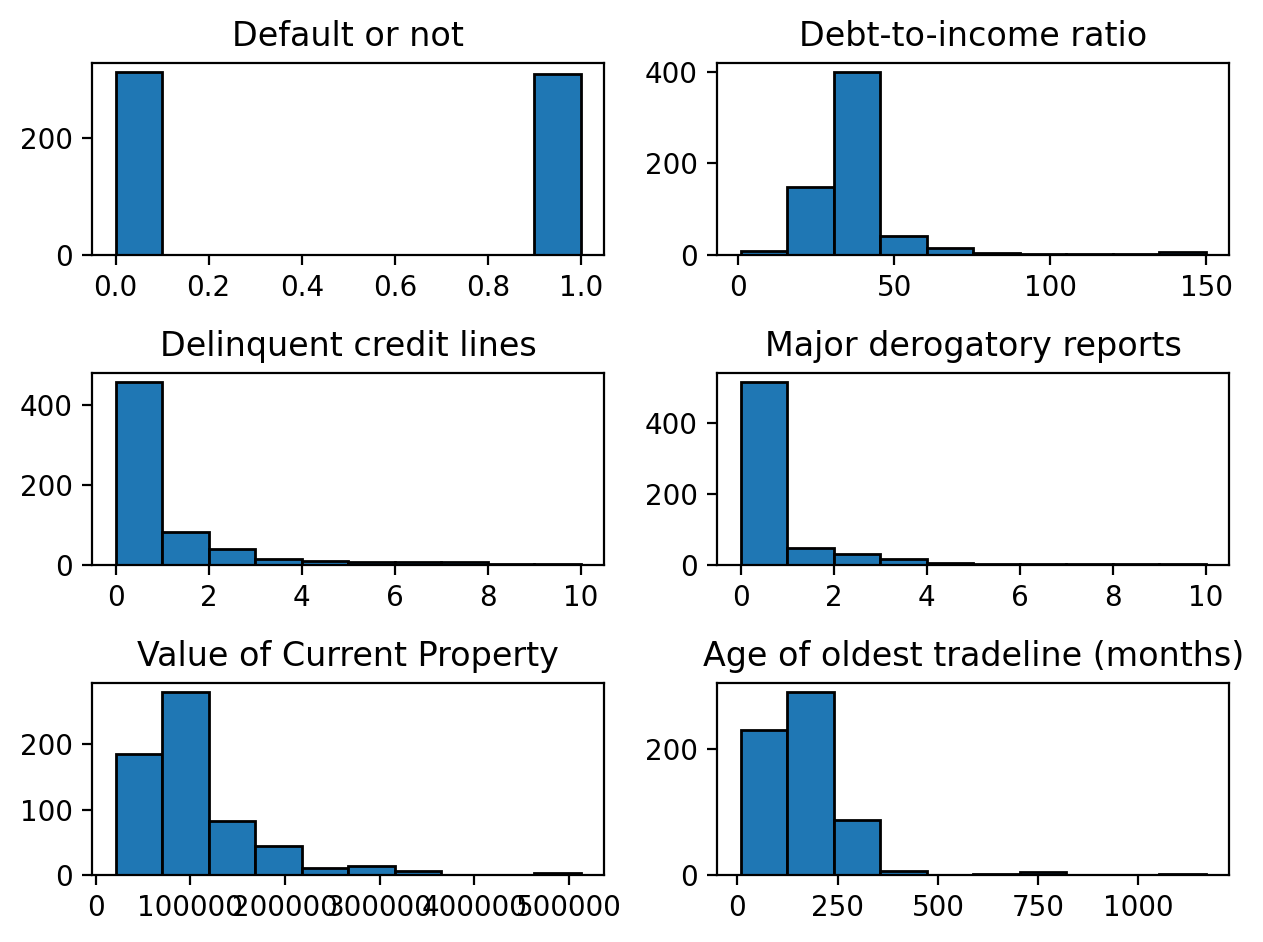

In [15]:
#Distribution of data: Histograms

#https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html (used for layout)

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2)

ax0.hist(df['BAD'], edgecolor='black')
ax0.set_title('Default or not')

ax1.hist(df['DEBTINC'], edgecolor='black')
ax1.set_title('Debt-to-income ratio')

ax2.hist(df['DELINQ'], edgecolor='black')
ax2.set_title('Delinquent credit lines')

ax3.hist(df['DEROG'], edgecolor='black')
ax3.set_title('Major derogatory reports')

ax4.hist(df['VALUE'], edgecolor='black')
ax4.set_title('Value of Current Property')

ax5.hist(df['CLAGE'], edgecolor='black')
ax5.set_title('Age of oldest tradeline (months)')

fig.tight_layout()
plt.show()

### Building the predictive model

In [16]:
#prepare dataset

X = df.iloc[:, 1:].values #all 5 provided variables used because each of them can be reasonably expected to have some explanatory power

Y = df.iloc[:, 0].values

In [17]:
#split the data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(497, 5)
(125, 5)
(497,)
(125,)


In [19]:
#Finding the best n_estimators for the model using 5-fold cross-validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

lowest_cross_val_error = np.inf
best_n_estimators = 0

indices = range(len(X_train))
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for k in range(5,101,5):
    
    errors = []
    
    for train_indices, val_indices in kf.split(indices):
        
        classifier = RandomForestClassifier(n_estimators = k, random_state = 0)
        
        classifier.fit(X_train[train_indices], Y_train[train_indices])
        
        predicted_Y_test = classifier.predict(X_train[val_indices])
        
        error = np.mean(predicted_Y_test != Y_train[val_indices])
        
        errors.append(error)
        
    cross_val_error = np.mean(errors)
    print('n_estimators:', k, 'cross validation error:', cross_val_error)

    if cross_val_error < lowest_cross_val_error:
        lowest_cross_val_error = cross_val_error
        best_n_estimators = k

print('\nBest n_estimators:', best_n_estimators, '\nCross validation error:', lowest_cross_val_error)

n_estimators: 5 cross validation error: 0.24355555555555558
n_estimators: 10 cross validation error: 0.2333333333333333
n_estimators: 15 cross validation error: 0.2494949494949495
n_estimators: 20 cross validation error: 0.2514949494949495
n_estimators: 25 cross validation error: 0.24147474747474748
n_estimators: 30 cross validation error: 0.23347474747474747
n_estimators: 35 cross validation error: 0.23553535353535354
n_estimators: 40 cross validation error: 0.2354949494949495
n_estimators: 45 cross validation error: 0.24353535353535355
n_estimators: 50 cross validation error: 0.2334949494949495
n_estimators: 55 cross validation error: 0.23147474747474747
n_estimators: 60 cross validation error: 0.22545454545454544
n_estimators: 65 cross validation error: 0.2294545454545455
n_estimators: 70 cross validation error: 0.23147474747474747
n_estimators: 75 cross validation error: 0.22945454545454544
n_estimators: 80 cross validation error: 0.23145454545454544
n_estimators: 85 cross validati

Let's have a look at the test data to evaluate performance of the model with the best n_estimators:

In [20]:
classifier = RandomForestClassifier(n_estimators = 60, random_state = 0)

In [21]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [22]:
predicted_Y_test = classifier.predict(X_test)

In [23]:
error_rate = np.mean(predicted_Y_test != Y_test)
print(error_rate)

0.24


Our model was trained using Random Forest Classifier with n_estimators = 60. Based on the information provided in the data, the model can predict whether a client will default or not with an estimated 76% accuracy.